In [2]:
import pandas as pd
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
# %matplotlib notebook

In [6]:
# Importing the satellite remote sensing measurement data for Sea Surface Temperature (SST)
# for the Central Great Barrier Reef Region
# Source Link(NOAA website): https://coralreefwatch.noaa.gov/product/vs/data.php
# Description of Columns: https://coralreefwatch.noaa.gov/product/vs/description.php#ascii
SST_data = pd.read_fwf('Resources/gbr_central.txt')
SST_data.head()

,YYYY,MM,DD,SST_MIN,SST_MAX,SST@90th_HS,SSTA@90th_HS,90th_HS>0,DHW_from_90th_HS>1,BAA_7day_max
0,1985,1,1,27.92,28.32,28.07,0.6058,0.12,0.0,0
1,1985,1,2,27.85,28.33,28.01,0.5865,0.10,0.0,0
2,1985,1,3,27.87,28.47,28.01,0.4874,0.06,0.0,0
3,1985,1,4,27.82,28.58,27.97,0.4903,0.04,0.0,0
4,1985,1,5,27.95,28.73,28.07,0.5616,0.13,0.0,0


In [7]:
# Renaming columns and combining colums to get the date
SST_data = SST_data.rename(columns={'YYYY': 'Year',
                           'MM': 'Month',
                           'DD': 'Day'
                          })

SST_data['Date'] = SST_data['Month'].astype(str)+ '/'+ SST_data['Day'].astype(str) \
                    + '/' + SST_data['Year'].astype(str)

SST_data = SST_data[['Year','Month','Day', 'Date','SST_MIN','SST_MAX','SST@90th_HS','90th_HS>0','DHW_from_90th_HS>1']]
SST_data.head()

,Year,Month,Day,Date,SST_MIN,SST_MAX,SST@90th_HS,90th_HS>0,DHW_from_90th_HS>1
0,1985,1,1,1/1/1985,27.92,28.32,28.07,0.12,0.0
1,1985,1,2,1/2/1985,27.85,28.33,28.01,0.10,0.0
2,1985,1,3,1/3/1985,27.87,28.47,28.01,0.06,0.0
3,1985,1,4,1/4/1985,27.82,28.58,27.97,0.04,0.0
4,1985,1,5,1/5/1985,27.95,28.73,28.07,0.13,0.0


In [27]:
# Filtering data for years 2000 - 2020
data = SST_data.loc[(SST_data['Year']>1999)]
data.reset_index(drop=True, inplace=True)
data.shape

(7399, 9)

In [23]:
# Source link: https://coralreefwatch.noaa.gov/product/vs/data/gbr_central.txt
# Long-term mean temperature for each month (Jan-Dec)
averaged_monthly_mean = [28.2080, 28.3422, 27.7395, 26.6994, 25.3221, 23.6220,
                         22.7473, 22.7427, 23.6184, 25.0898, 26.6232, 27.4833]

# Modified the order for averaged_monthly_mean (April to March)
modified_averaged_monthly_mean = [ 26.6994, 25.3221, 23.6220, 22.7473, 22.7427,23.6184,
                                  25.0898, 26.6232, 27.4833, 28.2080, 28.3422, 27.7395]

averaged_max_monthly_mean = max(averaged_monthly_mean)
print(f"The value of maximum monthly mean for Central Region of GBR is {averaged_max_monthly_mean} degree Celcius.")

# Bleaching Threshold is 1° C more than max average month temperature
bleaching_threshold = averaged_max_monthly_mean + 1
print(f"The value of bleaching threshold for Central Region of GBR is {bleaching_threshold} degree Celcius.")

The value of maximum monthly mean for Central Region of GBR is 28.3422 degree Celcius.
The value of bleaching threshold for Central Region of GBR is 29.3422 degree Celcius.


### Description of Columns: 
https://coralreefwatch.noaa.gov/product/vs/description.php#ascii

MMM(Maximum Monthly Mean): Highest monthly mean temperature (Long-Term). This value is 28.3422°C for Central GBR region.

HS(HotSpot): SST above the MMM. (Unit for SST: degree Celsius)

DHW(Degree Heat Week): Thermal stress accumulated over a 12-week period.
DHW is the the sum of HS value over a 12 week period. (Unit for DHW: degree Celcius Week)

SST@90th_HS:
The daily SST value where the HotSpot value is equal to the 90th percentile HotSpot value for pixels contained in a Regional Virtual Station.

### Note: For analysis, the Sea Surface Temperature in column 'SST@90th_HS' is used in all plots.

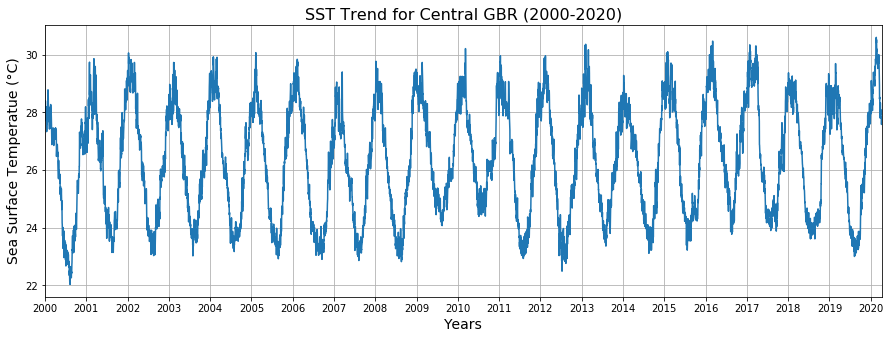

In [50]:
# Analyzing the trand in SST over last 20 years
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1, 1, 1)

major_ticks = np.arange(1, 7401, 365)
labels = np.arange(2000,2021,1)
ax.set_xticks(major_ticks)
ax.set_xticklabels(labels)
plt.plot(data['SST@90th_HS'])
plt.xlim(1, 7400)
plt.grid()
plt.xlabel('Years', fontsize='14')
plt.ylabel('Sea Surface Temperatue (°C)', fontsize='14')
plt.title('SST Trend for Central GBR (2000-2020)', fontsize='16')
plt.savefig('Output/SavedPlots/20_year_trend_central.png')
plt.show()


In [51]:
# Changing the index to 'Date' column
modified_data = SST_data.set_index('Date')

# Creating a new dataframe for last 5 years (April 2015 to March 2020)
five_year_data = modified_data.loc['4/1/2015':,]

In [54]:
# Grouping the five year data by year and month
five_year_grouped = five_year_data.groupby(['Year','Month'])
mean_five_year_grouped = five_year_grouped.mean()   #calculating mean of all values
max_five_year_grouped = five_year_grouped.max()     #calculating max of all values

In [55]:
# Calculating the monthly values for SST, HS and DHW
max_SST = max_five_year_grouped['SST@90th_HS']
mean_SST = mean_five_year_grouped['SST@90th_HS']

max_HS = max_five_year_grouped['90th_HS>0']

max_DHW = max_five_year_grouped['DHW_from_90th_HS>1']

In [56]:
#Setting the x-axis
x_axis = np.arange(1,62,1)

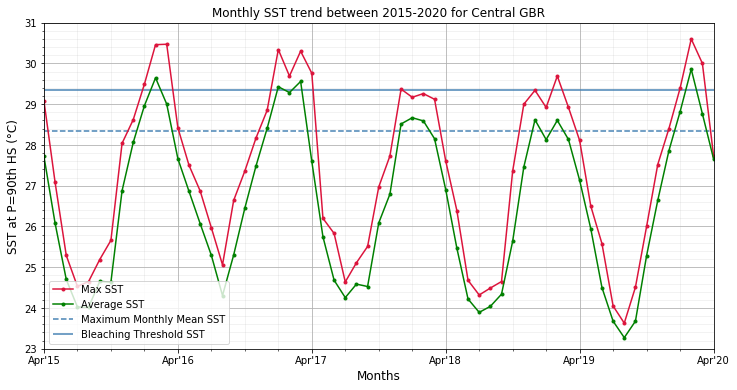

In [13]:
#Plotting the monthly trend in SST, HS and DHWfor last 5 years
fig, ax = plt.subplots(figsize=(12,6))
plt.plot(x_axis, max_SST, label= "Max SST", color= 'crimson', marker ='.')
plt.plot(x_axis, mean_SST, label= "Average SST", color= 'green', marker ='.')
plt.hlines(averaged_max_monthly_mean, 1, 61, color='steelblue', 
           label='Maximum Monthly Mean SST', linestyle='dashed')
plt.hlines(bleaching_threshold, 1, 61, color='steelblue', label='Bleaching Threshold SST')
plt.xlim(1,61)
plt.ylim(23,31)
major_xticks = np.arange(1, 62, 12)
minor_xticks = np.arange(1, 62, 3)
minor_yticks = np.arange(23,31,0.2)
ax.set_xticks(major_xticks)
ax.set_xticklabels(["Apr'15","Apr'16", "Apr'17", "Apr'18", "Apr'19", "Apr'20"], fontsize=10)
ax.set_xticks(minor_xticks, minor = True)
ax.set_yticks(minor_yticks, minor = True)
# plt.xticks(x_axis)
plt.title('Monthly SST trend between 2015-2020 for Central GBR', fontsize=12)
plt.xlabel('Months', fontsize=12)
plt.ylabel('SST at P=90th HS (°C)', fontsize=12)
plt.legend(loc='lower left')
plt.grid()
ax.grid(which='minor', alpha=0.2)
plt.show()

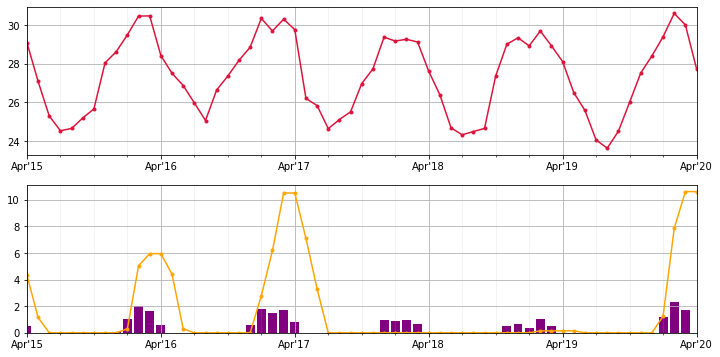

AxesSubplot(0.125,0.536818;0.775x0.343182)
AxesSubplot(0.125,0.125;0.775x0.343182)


In [57]:
fig,axes = plt.subplots(nrows=2,ncols=1,figsize=(12,6), sharex=False, sharey= False)
ax1 = axes[0]
ax2 = axes[1]
ax1.plot(x_axis, max_SST, label= "Max SST", color= 'crimson', marker ='.')
ax1.set_xlim(1,61)
# ax1.set_ylim(29.34,31)
major_xticks = np.arange(1, 62, 12)
minor_xticks = np.arange(1, 62, 3)
# minor_yticks = np.arange(23,31,0.2)
ax1.set_xticks(major_xticks)
ax1.set_xticklabels(["Apr'15","Apr'16", "Apr'17", "Apr'18", "Apr'19", "Apr'20"], fontsize=10)
ax1.set_xticks(minor_xticks, minor = True)
# ax1.set_yticks(minor_yticks, minor = True)

# plt.title('Monthly SST trend between 2015-2020 for Central GBR', fontsize=12)
# plt.xlabel('Months', fontsize=12)
# plt.ylabel('SST at P=90th HS (°C)', fontsize=12)
# plt.legend(loc='lower left')
ax1.grid()
ax1.grid(which='minor', alpha=0.2)



max_HS = max_five_year_grouped['90th_HS>0']
max_DHW = max_five_year_grouped['DHW_from_90th_HS>1']

ax2.bar(x_axis, max_HS, label= "Max HS", color= 'purple')
ax2.plot(x_axis, max_DHW, label= "Max DHW", color= 'orange', marker ='.')

ax2.set_xticks(major_xticks)
ax2.set_xticklabels(["Apr'15","Apr'16", "Apr'17", "Apr'18", "Apr'19", "Apr'20"], fontsize=10)
ax2.set_xticks(minor_xticks, minor = True)
ax2.set_xlim(1,61)
ax2.grid()
ax2.grid(which='minor', alpha=0.2)
plt.show()
ax2.set_ylim(0,10)
print(axes)
print(ax1)
print(ax2)

In [15]:
# Filtering the data for for last 5 years
data_2015_16 = five_year_data.loc['4/1/2015':'3/31/2016']
data_2016_17 = five_year_data.loc['4/1/2016':'3/31/2017']
data_2017_18 = five_year_data.loc['4/1/2017':'3/31/2018']
data_2018_19 = five_year_data.loc['4/1/2018':'3/31/2019']
data_2019_20 = five_year_data.loc['4/1/2019':'3/31/2020']

In [16]:
# Calculating the mean values for each month (for the last 5 years)
month_2015_16 = data_2015_16.groupby('Month')
month_avg_2015_16 = month_2015_16[['Year','SST@90th_HS','90th_HS>0','DHW_from_90th_HS>1']].mean()

month_2016_17 = data_2016_17.groupby('Month')
month_avg_2016_17 = month_2016_17[['Year','SST@90th_HS','90th_HS>0','DHW_from_90th_HS>1']].mean()

month_2017_18 = data_2017_18.groupby('Month')
month_avg_2017_18 = month_2017_18[['Year','SST@90th_HS','90th_HS>0','DHW_from_90th_HS>1']].mean()

month_2018_19 = data_2018_19.groupby('Month')
month_avg_2018_19 = month_2018_19[['Year','SST@90th_HS','90th_HS>0','DHW_from_90th_HS>1']].mean()

month_2019_20 = data_2019_20.groupby('Month')
month_avg_2019_20 = month_2019_20[['Year','SST@90th_HS','90th_HS>0','DHW_from_90th_HS>1']].mean()

month_avg_2019_20

,Year,SST@90th_HS,90th_HS>0,DHW_from_90th_HS>1
Month,,,,
1,2020,28.813226,0.598065,0.329303
2,2020,29.858621,1.688966,4.214183
3,2020,28.764839,0.705161,10.088403
4,2019,27.133333,0.000000,0.147100
5,2019,25.943226,0.000000,0.066432
6,2019,24.503333,0.000000,0.000000
7,2019,23.677419,0.000000,0.000000
8,2019,23.273871,0.000000,0.000000
9,2019,23.677333,0.000000,0.000000


In [17]:
# Rearranging the rows of the dataframe containg the month wise average for each year
new_index = [4,5,6,7,8,9,10,11,12,1,2,3]

month_avg_2015_16 = month_avg_2015_16.reindex(new_index)
month_avg_2016_17 = month_avg_2016_17.reindex(new_index)
month_avg_2017_18 = month_avg_2017_18.reindex(new_index)
month_avg_2018_18 = month_avg_2018_19.reindex(new_index)
month_avg_2019_20 = month_avg_2019_20.reindex(new_index)

month_avg_2019_20

,Year,SST@90th_HS,90th_HS>0,DHW_from_90th_HS>1
Month,,,,
4,2019,27.133333,0.000000,0.147100
5,2019,25.943226,0.000000,0.066432
6,2019,24.503333,0.000000,0.000000
7,2019,23.677419,0.000000,0.000000
8,2019,23.273871,0.000000,0.000000
9,2019,23.677333,0.000000,0.000000
10,2019,25.283226,0.000000,0.000000
11,2019,26.640000,0.000000,0.000000
12,2019,27.859032,0.000000,0.000000


In [18]:
# plt.bar(np.arange(0,365,1),data_2015_16['DHW_from_90th_HS>1'])

In [19]:
# Defining the labels for the x axis
x_axis = np.arange(1,13,1)
months = ['Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar']

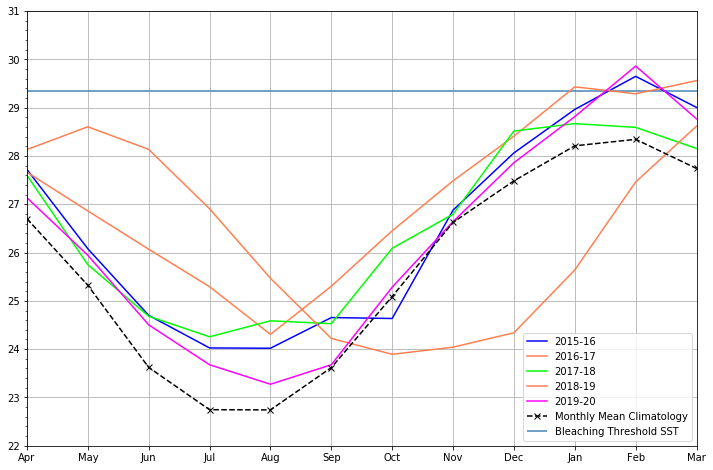

In [20]:
fig,ax = plt.subplots(figsize=(12,8))

ax.plot(x_axis, month_avg_2015_16['SST@90th_HS'], label='2015-16', color='blue')
ax.plot(x_axis, month_avg_2016_17['SST@90th_HS'], label='2016-17', color='coral')
ax.plot(x_axis, month_avg_2017_18['SST@90th_HS'], label='2017-18', color='lime')
ax.plot(x_axis, month_avg_2018_19['SST@90th_HS'], label='2018-19', color='coral')
ax.plot(x_axis, month_avg_2019_20['SST@90th_HS'], label='2019-20', color='fuchsia')

ax.plot(x_axis, modified_averaged_monthly_mean, color = 'black',
        marker = 'x', linestyle='dashed', label='Monthly Mean Climatology')
ax.hlines(bleaching_threshold, 1, 12, color='steelblue', label='Bleaching Threshold SST')
ax.set_xticks(x_axis)
ax.set_xticklabels(months)
ax.set_yticks(np.arange(22,31,0.2),minor=True)
plt.xlim(1,12)
plt.ylim(22,31)
plt.legend(loc = 'lower right')
plt.grid()
plt.show()

#### Null Hypothesis: There is no significant change in the SST over the last five years

In [21]:
# Daily data for summer months (Dec - March) for each year
summer_2015_16 = five_year_data.loc['12/1/2015':'3/31/2016']['SST@90th_HS']
summer_2016_17 = five_year_data.loc['12/1/2016':'3/31/2017']['SST@90th_HS']
summer_2017_18 = five_year_data.loc['12/1/2017':'3/31/2018']['SST@90th_HS']
summer_2018_19 = five_year_data.loc['12/1/2018':'3/31/2019']['SST@90th_HS']
summer_2019_20 = five_year_data.loc['12/1/2019':'3/31/2020']['SST@90th_HS']

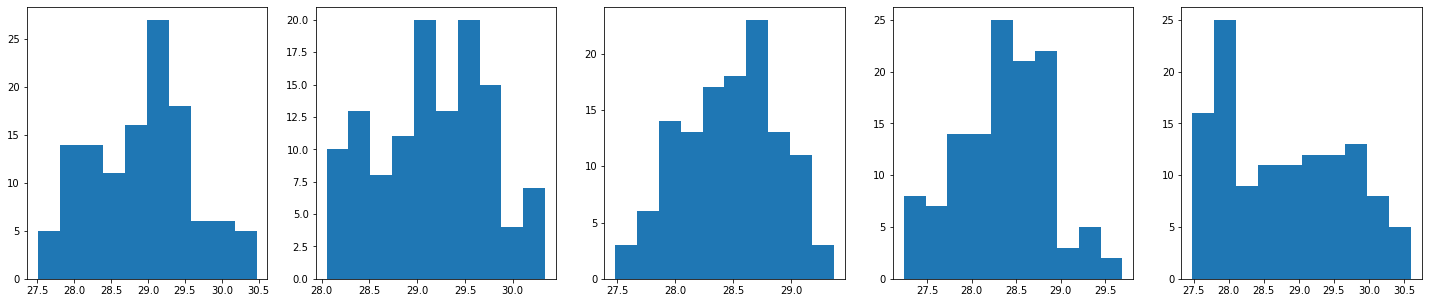

Summer 2015_16: NormaltestResult(statistic=0.6818842538211202, pvalue=0.7111000605729974)
Summer 2016_17: NormaltestResult(statistic=6.21435229577866, pvalue=0.04472707983680174)
Summer 2017_18: NormaltestResult(statistic=3.001290663370962, pvalue=0.22298621363771737)
Summer 2018_19: NormaltestResult(statistic=0.8467828575804304, pvalue=0.6548222666528312)
Summer 2019_20: NormaltestResult(statistic=9.320175540771167, pvalue=0.009465631563117262)


In [22]:
# Checking if the summer data for each year follows a normal ditribution
fig, axes = plt.subplots(1,5, figsize=(25,5))
axes[0].hist(summer_2015_16)
axes[1].hist(summer_2016_17)
axes[2].hist(summer_2017_18)
axes[3].hist(summer_2018_19)
axes[4].hist(summer_2019_20)
plt.show()
print(f'Summer 2015_16: {sts.normaltest(summer_2015_16.sample(50))}')
print(f'Summer 2016_17: {sts.normaltest(summer_2016_17.sample(50))}')
print(f'Summer 2017_18: {sts.normaltest(summer_2017_18.sample(50))}')
print(f'Summer 2018_19: {sts.normaltest(summer_2018_19.sample(50))}')
print(f'Summer 2019_20: {sts.normaltest(summer_2019_20.sample(50))}')

In [23]:
summer_2015_16_df = summer_2015_16.reset_index()
summer_2016_17_df = summer_2016_17.reset_index()
summer_2017_18_df = summer_2017_18.reset_index()
summer_2018_19_df = summer_2018_19.reset_index()
summer_2019_20_df = summer_2019_20.reset_index()

In [24]:
# Creating a combined DataFrame for Summer Months (Dec-March) for five years to plot a boxplot
summer_2015_16_df['Year'] = '2015-16'
summer_2016_17_df['Year'] = '2016-17'
summer_df = pd.merge(summer_2015_16_df, summer_2016_17_df,how='outer') #merging df for 2015_16 and 2016_17

summer_2017_18_df['Year'] = '2017-18'
summer_df = pd.merge(summer_df, summer_2017_18_df, how='outer')

summer_2018_19_df['Year'] = '2018-19'
summer_df = pd.merge(summer_df, summer_2018_19_df, how='outer')

summer_2019_20_df['Year'] = '2019-20'
summer_df = pd.merge(summer_df, summer_2019_20_df, how='outer')

summer_df.to_csv('Output/DataFiles/Summer_DF_Central_GBR.csv', index=False)
summer_df

,Date,SST@90th_HS,Year
0,12/1/2015,27.99,2015-16
1,12/2/2015,27.76,2015-16
2,12/3/2015,27.88,2015-16
3,12/4/2015,27.83,2015-16
4,12/5/2015,28.14,2015-16
...,...,...,...
602,3/27/2020,27.88,2019-20
603,3/28/2020,27.87,2019-20
604,3/29/2020,27.79,2019-20
605,3/30/2020,27.85,2019-20


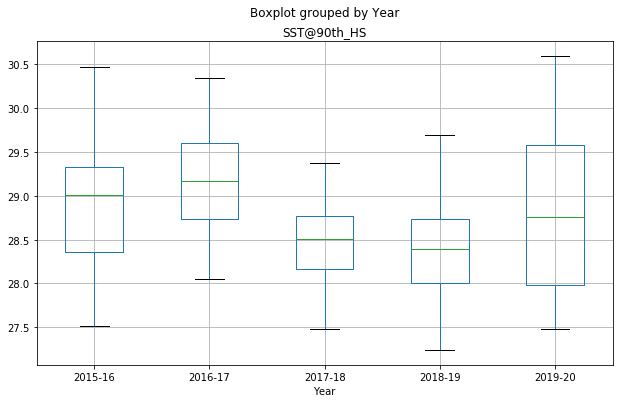

In [28]:
summer_df.boxplot("SST@90th_HS", by="Year", figsize=(10, 6))
plt.show()

In [26]:
sts.f_oneway(summer_2015_16, summer_2016_17, summer_2017_18, summer_2018_19, summer_2019_20)

F_onewayResult(statistic=31.862851358175284, pvalue=4.224088596903869e-24)

Assuming 5% significance level, we reject the Null Hypothesis as pvalue < 0.05

In [95]:
# sts.ttest_ind(summer_2015_16, summer_2016_17, equal_var=False)

In [96]:
# sts.ttest_ind(summer_2017_18, summer_2018_19, equal_var=False)

In [97]:
# sts.ttest_ind(summer_2016_17, summer_2018_19, equal_var=True)

In [98]:
# sts.ttest_ind(summer_2018_19, summer_2019_20, equal_var=True)